In [ ]:
import numpy as np

import matplotlib.pyplot as plt

import grand.dataio.root_trees as rt

import database.tools as tools

import importlib

#plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

%matplotlib inline

tools.load_logger('debug')

Welcome to JupyROOT 6.30/04


<Logger database.v2.tools (DEBUG)>

In [4]:
pol = np.array(['X','Y','Z'])
pol[[0,1]]

array(['X', 'Y'], dtype='<U1')

In [2]:
test_file      = '/sps/grand/data/gp80/GrandRoot/2025/02/GP80_20250204_154449_RUN145_MD_RAW-ChanXYZ-20dB-GP43-20hz-0030.root'
n_entries_test = 1000
traces         = np.zeros( (n_entries_test,3,1024) )

with rt.DataFile(test_file) as df:
    tadc = df.tadc

    for i in range(n_entries_test):
        tadc.get_entry(i)
        traces[i] = tadc.trace_ch[0][1:] # remove float channel

traces_filtered = tools.filter_traces(traces)

2025-04-03 09:58:29,211 [MainThread  ] [INFO   ]  Applying notch filters...
2025-04-03 09:58:57,638 [MainThread  ] [INFO   ]  Traces filtered!


In [3]:
importlib.reload(tools)

dict_trigger_params = {'th1' : 45, 'th2' : 35, 't_quiet' : 500, 't_period' : 1000, 't_sepmax' : 200, 'nc_min' : 2, 'nc_max' : 10}
samples_from_edge   = 100

# Compute the first sample from which T_quiet can be evaluated given boundary conditions
sample_min = samples_from_edge

# Compute the last sample up to which T_period can be evaluated given boundary conditions
sample_max = 1024 - dict_trigger_params['t_period']//2

FLT0_flags, FLT0_first_T1_idx = tools.do_FLT0(traces_filtered,dict_trigger_params,samples_from_edge=samples_from_edge)

2025-04-03 09:58:57,777 [MainThread  ] [DEBUG  ]  Searching triggers in trace 0
2025-04-03 09:58:57,777 [MainThread  ] [DEBUG  ]  Channel 0
2025-04-03 09:58:57,779 [MainThread  ] [DEBUG  ]  Skipping T1 @ index = 7: too close to edge
2025-04-03 09:58:57,779 [MainThread  ] [DEBUG  ]  Skipping T1 @ index = 10: too close to edge
2025-04-03 09:58:57,779 [MainThread  ] [DEBUG  ]  Now checking T1 @ index = 486
2025-04-03 09:58:57,780 [MainThread  ] [DEBUG  ]  Killed by Tsepmax < 272 ns
2025-04-03 09:58:57,781 [MainThread  ] [DEBUG  ]  Channel 1
2025-04-03 09:58:57,782 [MainThread  ] [DEBUG  ]  Skipping T1 @ index = 6: too close to edge
2025-04-03 09:58:57,782 [MainThread  ] [DEBUG  ]  Skipping T1 @ index = 16: too close to edge
2025-04-03 09:58:57,783 [MainThread  ] [DEBUG  ]  Skipping T1 @ index = 17: too close to edge
2025-04-03 09:58:57,784 [MainThread  ] [DEBUG  ]  Skipping T1 @ index = 27: too close to edge
2025-04-03 09:58:57,784 [MainThread  ] [DEBUG  ]  Stopping: T_period cannot be ev

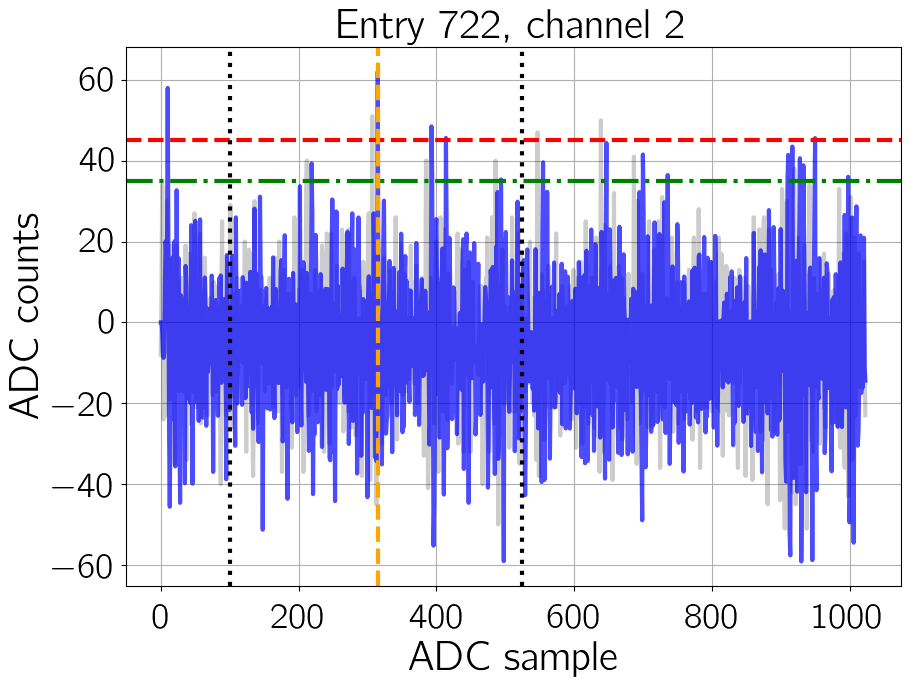

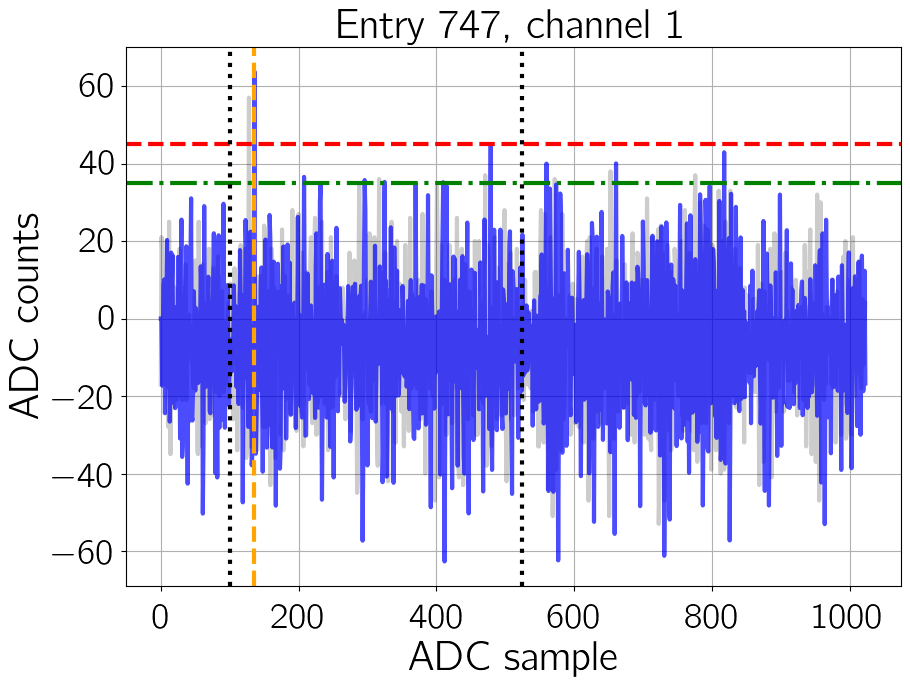

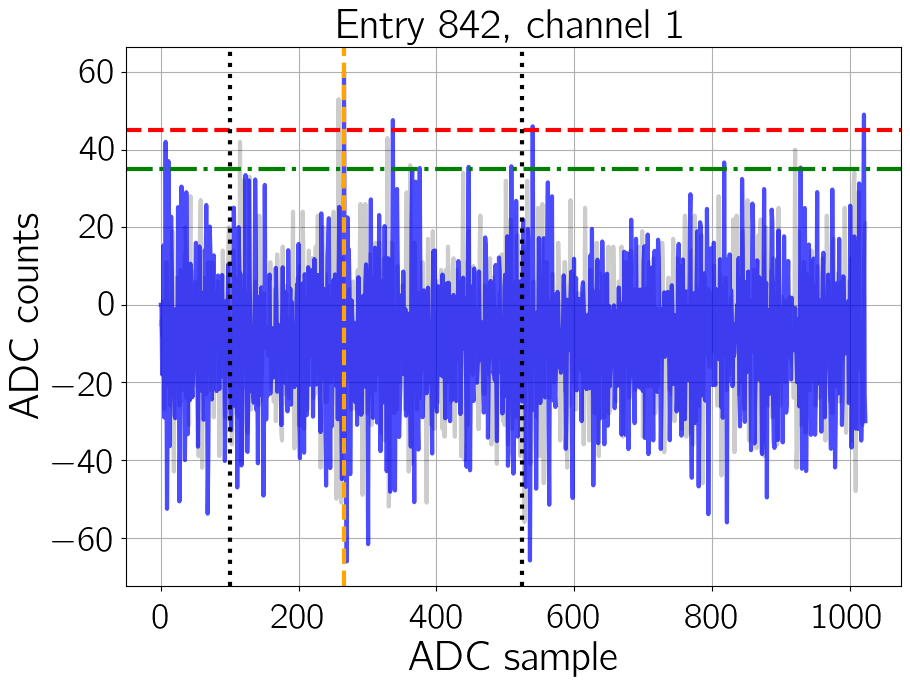

In [4]:
for entry in range(FLT0_flags.shape[0]):
    for ch in range(FLT0_flags.shape[1]):
        if FLT0_flags[entry,ch] and np.max(traces_filtered[entry,ch,sample_min:sample_max] > 60):
            plt.plot(traces[entry,ch],label='Trace',color='k',alpha=.2)
            plt.plot(traces_filtered[entry,ch],label='Trace',color='b',alpha=.7)
            plt.axhline(dict_trigger_params['th1'],ls='--',color='r')
            plt.axhline(dict_trigger_params['th2'],ls='-.',color='g')
            plt.axvline(sample_min,ls=':',color='k')
            plt.axvline(sample_max,ls=':',color='k')
            plt.axvline(FLT0_first_T1_idx[entry,ch],ls='--',color='orange')
            #plt.ylim([-60,60])
            plt.xlabel('ADC sample')
            plt.ylabel('ADC counts')
            plt.title(f'Entry {entry}, channel {ch+1}')
            #plt.legend()
            plt.show()

In [44]:
np.any(FLT0_flags,axis=1)

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
FLT0_flags.shape, FLT0_flags[:,[0,1]].shape

((1000, 3), (1000, 2))

In [ ]:
np.take_along_axis(FLT0_flags,np.array([0,1]),axis=1)

ValueError: `indices` and `arr` must have the same number of dimensions